# Fuzzification

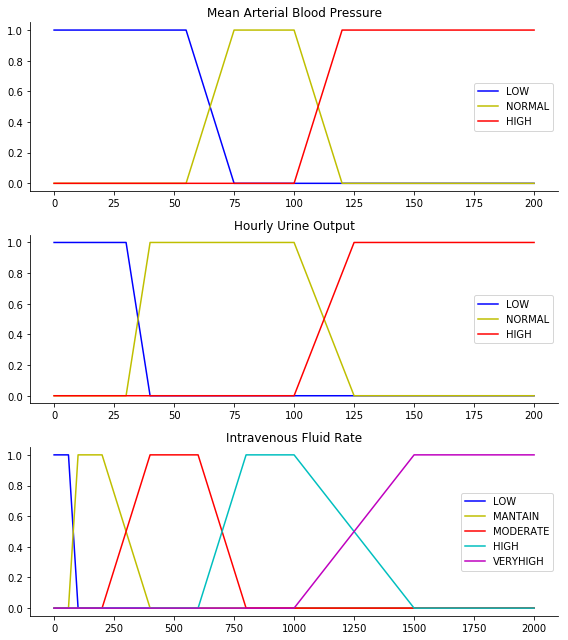

In [1]:
import numpy as np 
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl
%matplotlib inline

#Generate universe variables
#     * MAP and HUO are in the subjective ranges, 200
#     *IFR has a large range about 2000
x_MAP = np.arange(0, 201, 1)
x_HUO = np.arange(0, 201, 1)
x_IFR = np.arange(0, 2001, 1)

# Generate fuzzy membership functions
# trapezoidal membership function
low_MAP = fuzz.trapmf(x_MAP, [0,0,55,75])
normal_MAP = fuzz.trapmf(x_MAP, [55,75,100,120])
high_MAP = fuzz.trapmf(x_MAP, [100, 120, 200,200])
low_HUO = fuzz.trapmf(x_HUO, [0,0,30,40])
normal_HUO = fuzz.trapmf(x_HUO, [30,40,100,125])
high_HUO = fuzz.trapmf(x_HUO, [100, 125, 200, 200])
low_IFR = fuzz.trapmf(x_IFR, [0,0,60,100])
maintain_IFR = fuzz.trapmf(x_IFR, [60,100,200,400])
moderate_IFR = fuzz.trapmf(x_IFR, [200,400,600,800])
high_IFR = fuzz.trapmf(x_IFR, [600,800,1000,1500])
veryhigh_IFR = fuzz.trapmf(x_IFR, [1000,1500,2000,2000])

#Visualize these universes and membership functions
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8,9))

#Plot for Mean Arterial Blood Pressure 
ax0.plot(x_MAP, low_MAP, 'b', linewidth=1.5, label='LOW')
ax0.plot(x_MAP, normal_MAP, 'y', linewidth=1.5, label='NORMAL')
ax0.plot(x_MAP, high_MAP, 'r', linewidth=1.5, label='HIGH')
ax0.set_title('Mean Arterial Blood Pressure')
ax0.legend()

#Plot for Hourly Urine Output
ax1.plot(x_HUO, low_HUO, 'b', linewidth=1.5, label='LOW')
ax1.plot(x_HUO, normal_HUO, 'y', linewidth=1.5, label='NORMAL')
ax1.plot(x_HUO, high_HUO, 'r', linewidth=1.5, label='HIGH')
ax1.set_title('Hourly Urine Output')
ax1.legend()

#Plot for Intravenous Fluid Rate
ax2.plot(x_IFR, low_IFR, 'b', linewidth=1.5, label='LOW')
ax2.plot(x_IFR, maintain_IFR, 'y', linewidth=1.5, label='MANTAIN')
ax2.plot(x_IFR, moderate_IFR, 'r', linewidth=1.5, label='MODERATE')
ax2.plot(x_IFR, high_IFR, 'c', linewidth=1.5, label='HIGH')
ax2.plot(x_IFR, veryhigh_IFR, 'm', linewidth=1.5, label='VERYHIGH')
ax2.set_title('Intravenous Fluid Rate')
ax2.legend()

# Turn off top/right axes
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
plt.tight_layout()

# Rule Evaluation

Degree of Membership of Mean Arterial Blood Pressure
Low:
0.0
Normal:
1.0
High:
0.0

Degree of Membership of Hourly Urine Output
Low:
0.0
Normal:
0.6
High:
0.4


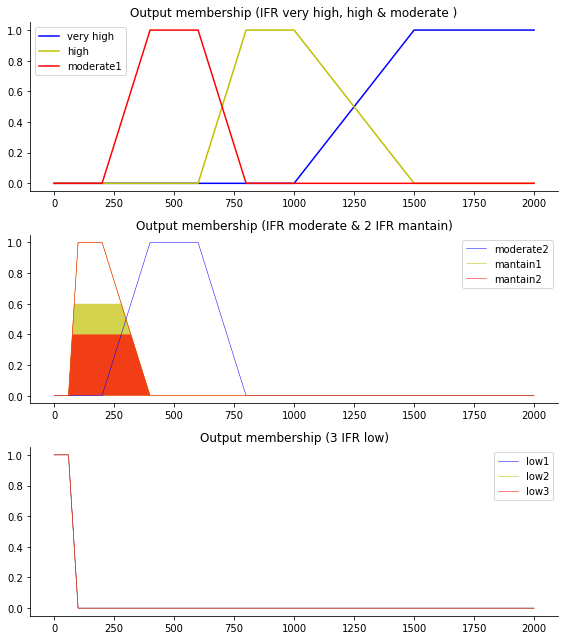

In [2]:
#Fuzzy degree of membership for MAP
MAP_lo = fuzz.interp_membership(x_MAP, low_MAP, 90.0)
MAP_norm = fuzz.interp_membership(x_MAP, normal_MAP, 90.0)
MAP_hi = fuzz.interp_membership(x_MAP, high_MAP, 90.0)

#Fuzzy degree of membership for HUO
HUO_lo = fuzz.interp_membership(x_HUO, low_HUO, 110.0)
HUO_norm = fuzz.interp_membership(x_HUO, normal_HUO, 110.0)
HUO_hi = fuzz.interp_membership(x_HUO, high_HUO, 110.0)

print("Degree of Membership of Mean Arterial Blood Pressure")
print("Low:")
print(MAP_lo)
print("Normal:")
print(MAP_norm)
print("High:")
print(MAP_hi)
print('')
print("Degree of Membership of Hourly Urine Output")
print("Low:")
print(HUO_lo)
print("Normal:")
print(HUO_norm)
print("High:")
print(HUO_hi)

#Rule 1 = if MAP is low and HUO is low, then IFR is very high 
active_rule1 = np.fmin(MAP_lo, HUO_lo)
#Rule 2 = if MAP is low and HUO is normal, then IFR is high
active_rule2 = np.fmin(MAP_lo, HUO_norm)
#Rule 3 = if MAP is low and HUO is high, then IFR is moderate
active_rule3 = np.fmin(MAP_lo, HUO_hi)
#Rule 4 = if MAP is normal and HUO is low, then IFR is moderate
active_rule4 = np.fmin(MAP_norm, HUO_lo)
#Rule 5 = if MAP is normal and HUO is normal, then IFR is mantain
active_rule5 = np.fmin(MAP_norm, HUO_norm)
#Rule 6 = if MAP is normal and HUO is high, then IFR is mantain
active_rule6 = np.fmin(MAP_norm, HUO_hi)
#Rule 7 = if MAP is high and HUO is low, then IFR is low
active_rule7 = np.fmin(MAP_hi, HUO_lo)
#Rule 8 = if MAP is high and HUO is normal, then IFR is low
active_rule8 = np.fmin(MAP_hi, HUO_norm)
#Rule 9 = if MAP is high and HUO is high, then IFR is low
active_rule9 = np.fmin(MAP_hi, HUO_hi)

IFR_activation_veryhigh = np.fmin(active_rule1, veryhigh_IFR)
IFR_activation_high = np.fmin(active_rule2, high_IFR)
IFR_activation_moderate = np.fmin(active_rule3, moderate_IFR)


IFR_activation2_moderate2 = np.fmin(active_rule4, moderate_IFR)
IFR_activation2_maintain = np.fmin(active_rule5, maintain_IFR)
IFR_activation2_maintain2 = np.fmin(active_rule6, maintain_IFR)

IFR_activation3_low = np.fmin(active_rule7, low_IFR)
IFR_activation3_low2 = np.fmin(active_rule8, low_IFR)
IFR_activation3_low3 = np.fmin(active_rule9, low_IFR)


IFR0 = np.zeros_like(x_IFR)

#Visualize these Output Membership
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8,9))

ax0.fill_between(x_IFR, IFR0, IFR_activation_veryhigh, facecolor='b', alpha=0.7)
ax0.plot(x_IFR, veryhigh_IFR, 'b', linewidth=1.5,label='very high' )
ax0.fill_between(x_IFR, IFR0, IFR_activation_high, facecolor='y', alpha=0.7)
ax0.plot(x_IFR, high_IFR, 'y', linewidth=1.5, label = 'high')
ax0.fill_between(x_IFR, IFR0, IFR_activation_moderate, facecolor='r', alpha=0.7)
ax0.plot(x_IFR, moderate_IFR, 'r', linewidth=1.5, label='moderate1')
ax0.set_title('Output membership (IFR very high, high & moderate )')
ax0.legend()

ax1.fill_between(x_IFR, IFR0, IFR_activation2_moderate2, facecolor='b', alpha=0.7)
ax1.plot(x_IFR, moderate_IFR, 'b', linewidth=0.5, label='moderate2', )
ax1.fill_between(x_IFR, IFR0, IFR_activation2_maintain, facecolor='y', alpha=0.7)
ax1.plot(x_IFR, maintain_IFR, 'y', linewidth=0.5, label='mantain1')
ax1.fill_between(x_IFR, IFR0, IFR_activation2_maintain2, facecolor='r', alpha=0.7)
ax1.plot(x_IFR, maintain_IFR, 'r', linewidth=0.5, label='mantain2')
ax1.set_title('Output membership (IFR moderate & 2 IFR mantain)')
ax1.legend()

ax2.fill_between(x_IFR, IFR0, IFR_activation3_low, facecolor='b', alpha=0.7)
ax2.plot(x_IFR, low_IFR, 'b', linewidth=0.5, label = 'low1' )
ax2.fill_between(x_IFR, IFR0, IFR_activation3_low2, facecolor='y', alpha=0.7)
ax2.plot(x_IFR, low_IFR, 'y', linewidth=0.5, label='low2')
ax2.fill_between(x_IFR, IFR0, IFR_activation3_low3, facecolor='r', alpha=0.7)
ax2.plot(x_IFR, low_IFR, 'r', linewidth=0.5, label='low3')
ax2.set_title('Output membership (3 IFR low)')
ax2.legend()

# Turn off top/right axes
for ax in (ax0,ax1,ax2 ):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
plt.tight_layout()

# Aggregation & Defuzzification

2001
208.1492537313438


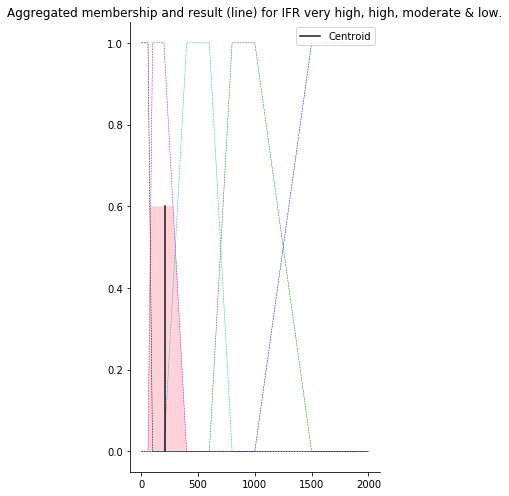

In [4]:
# Aggregate the first output membership functions together
full_aggregated = np.fmax(IFR_activation2_moderate2, 
            np.fmax(IFR_activation2_maintain, 
            np.fmax(IFR_activation2_maintain2, 
            np.fmax(IFR_activation3_low, 
            np.fmax(IFR_activation3_low2,
            np.fmax(IFR_activation3_low3,
            np.fmax(IFR_activation_veryhigh,
            np.fmax(IFR_activation_high, IFR_activation_moderate))))))))


print(len(full_aggregated))


#Calculate defuzzified result
output_IFR = fuzz.defuzz(x_IFR, full_aggregated, 'centroid')


output_IFR_activation = fuzz.interp_membership(x_IFR, full_aggregated, output_IFR) #for plot centroid


# Visualize this
fig, ax0= plt.subplots(figsize=(6,7))

ax0.plot(x_IFR, veryhigh_IFR, 'b', linewidth=0.5, linestyle='--')
ax0.plot(x_IFR, high_IFR, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_IFR, moderate_IFR, 'c', linewidth=0.5, linestyle='--')
ax0.plot(x_IFR, maintain_IFR, 'm', linewidth=0.5, linestyle='--')
ax0.plot(x_IFR, low_IFR, 'k', linewidth=0.5, linestyle='--', )
ax0.fill_between(x_IFR, IFR0, full_aggregated, facecolor='Pink', alpha=0.7)
ax0.plot([output_IFR, output_IFR], [0, output_IFR_activation], 'k', linewidth=1.5, alpha=0.9, label="Centroid")



ax0.set_title('Aggregated membership and result (line) for IFR very high, high, moderate & low.')
ax0.legend(loc = 'upper right')


# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
plt.tight_layout()
print output_IFR

# Creating the Tipping Controller

C:\Users\User\anaconda3\envs\matt1998\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


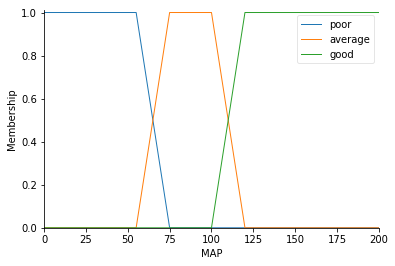

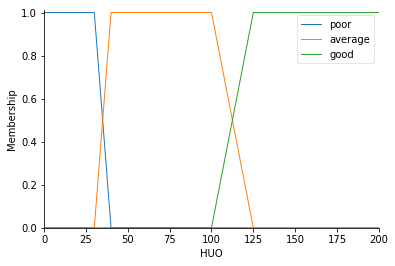

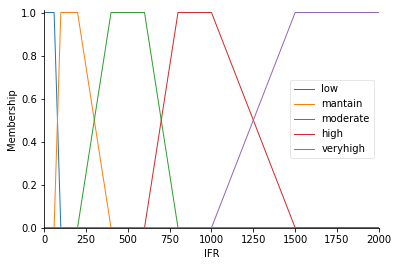

In [7]:
#New Antecedent/Consequent objects hold universe variables and membership
#Antecedent - Poor, Average, Good
mean_arterial_pressure = ctrl.Antecedent(x_MAP, 'MAP')
hourly_urine_output = ctrl.Antecedent(x_HUO, 'HUO')
intravenous_fluid_rate = ctrl.Consequent(x_IFR, 'IFR')

#Auto-membership function population is possible with .automf(3,5 or 7)
mean_arterial_pressure.automf(3)
hourly_urine_output.automf(3)

#Custom membership functions can be built interactively with a familiar.
#Pythonic API

mean_arterial_pressure['poor'] = fuzz.trapmf(mean_arterial_pressure.universe, [0,0,55,75])
mean_arterial_pressure['average'] = fuzz.trapmf(mean_arterial_pressure.universe, [55,75,100,120])
mean_arterial_pressure['good'] = fuzz.trapmf(mean_arterial_pressure.universe, [100, 120, 200,200])
hourly_urine_output['poor'] = fuzz.trapmf(hourly_urine_output.universe, [0,0,30,40])
hourly_urine_output['average'] = fuzz.trapmf(hourly_urine_output.universe, [30,40,100,125])
hourly_urine_output['good'] = fuzz.trapmf(hourly_urine_output.universe, [100, 125, 200, 200])
intravenous_fluid_rate['low'] = fuzz.trapmf(intravenous_fluid_rate.universe, [0,0,60,100])
intravenous_fluid_rate['mantain'] = fuzz.trapmf(intravenous_fluid_rate.universe, [60,100,200,400])
intravenous_fluid_rate['moderate'] = fuzz.trapmf(intravenous_fluid_rate.universe, [200,400,600,800])
intravenous_fluid_rate['high'] = fuzz.trapmf(intravenous_fluid_rate.universe, [600,800,1000,1500])
intravenous_fluid_rate['veryhigh'] = fuzz.trapmf(intravenous_fluid_rate.universe, [1000,1500,2000,2000])

mean_arterial_pressure.view()
hourly_urine_output.view()
intravenous_fluid_rate.view()

# Fuzzy Rules

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xcd41148>)

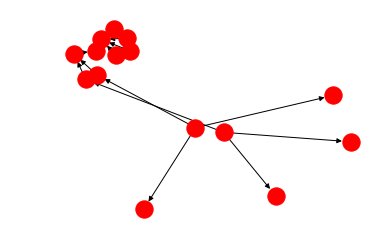

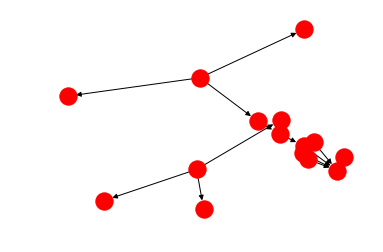

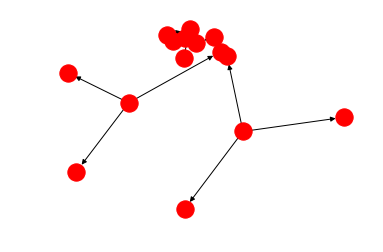

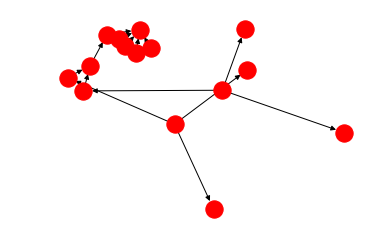

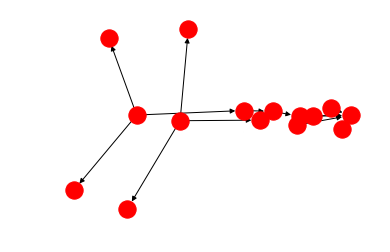

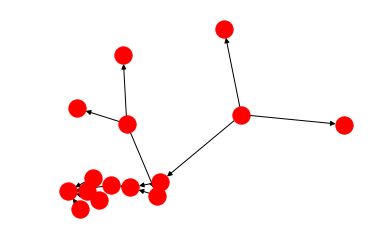

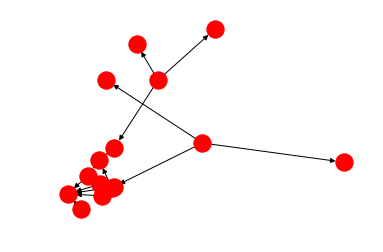

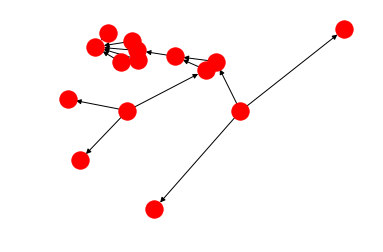

In [8]:
#Connecting Antecedent to Consequent
rule1 = ctrl.Rule(mean_arterial_pressure['poor'] & hourly_urine_output['poor'],intravenous_fluid_rate['veryhigh'])
rule2 = ctrl.Rule(mean_arterial_pressure['poor'] & hourly_urine_output['average'], intravenous_fluid_rate['high'])
rule3 = ctrl.Rule(mean_arterial_pressure['poor'] & hourly_urine_output['good'],intravenous_fluid_rate['moderate'])

#Below rules can't be aggregated and defuzzification
#---------------------------------------------------------------------------------------------------------------------------
rule4 = ctrl.Rule(mean_arterial_pressure['average'] & hourly_urine_output['poor'],intravenous_fluid_rate['moderate'])
rule5 = ctrl.Rule(mean_arterial_pressure['average'] & hourly_urine_output['average'],intravenous_fluid_rate['mantain'])
rule6 = ctrl.Rule(mean_arterial_pressure['average'] & hourly_urine_output['good'],intravenous_fluid_rate['mantain'])

rule7 = ctrl.Rule(mean_arterial_pressure['good'] & hourly_urine_output['poor'],intravenous_fluid_rate['low'])
rule8 = ctrl.Rule(mean_arterial_pressure['good'] & hourly_urine_output['average'],intravenous_fluid_rate['low'])
rule9 = ctrl.Rule(mean_arterial_pressure['good'] & hourly_urine_output['good'],intravenous_fluid_rate['low'])
#------------------------------------------------------------------------------------------------------------------

rule1.view()
rule2.view()
rule3.view()
rule4.view()
rule5.view()
rule6.view()
rule8.view()
rule9.view()

# Creating Control and System Simulation

In [9]:
ifr_ctrl1 = ctrl.ControlSystem([rule1, rule2, rule3])
ifr_ctrl2 = ctrl.ControlSystem([rule4, rule5, rule6])
ifr_ctrl3 = ctrl.ControlSystem([rule7, rule8, rule9])

In [10]:
rating1 = ctrl.ControlSystemSimulation(ifr_ctrl1)
rating2 = ctrl.ControlSystemSimulation(ifr_ctrl2) #will be error because 
rating3 = ctrl.ControlSystemSimulation(ifr_ctrl3)

In [11]:
#Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
rating1.input['MAP'] = 62.0
rating1.input['HUO'] = 110.0

rating1.compute()

1611.1111111111109


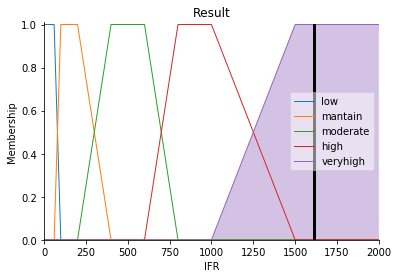

In [109]:
plt.ion()
print rating1.output['IFR']
intravenous_fluid_rate.view(sim=rating1)
plt.title('Result')
plt.show()
plt.ioff()

In [13]:
rating2.input['MAP'] = 62.0
rating2.input['HUO'] = 110.0

rating2.compute()